<a href="https://colab.research.google.com/github/Yunho-seo/education_center5/blob/main/16_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# python core, numpy, pandas의 시간 비교
from datetime import datetime, timedelta
import calendar

today = datetime.now()
yesterday = today - timedelta(days = 1)
tomorrow = today + timedelta(days = 1)
print("오늘: ", today)
print("어제: ", yesterday)
print("내일: ", tomorrow)
start_day, last_day = calendar.monthrange(today.year, today.month)
print("이 달의 마지막 날은", last_day, "입니다")

오늘:  2023-05-10 01:03:04.852194
어제:  2023-05-09 01:03:04.852194
내일:  2023-05-11 01:03:04.852194
이 달의 마지막 날은 31 입니다


In [ ]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)  # 나노 초 (ns)
print(date)
date + np.arange(12)

2015-07-04


array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [ ]:
import pandas as pd
date = pd.to_datetime("12 5, 2015")  # Timestamp : python core의 데이터 저장 (Timestamp 형식으로 저장됨)

date

Timestamp('2015-12-05 00:00:00')

In [ ]:
# date + pd.to_timedelta(np.arange(12), '0')  # 호환이 되지 않음

# range(list), arange(ndarray), date_range(DatetimeIndex)
range_date = pd.date_range(start = '1/1/2019', end='1/08/2019', freq='D')  # freq = 'D' : Day(일 별로 간격을 형성) (start ~ end까지)
print(range_date)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
df = pd.DataFrame(range_date, columns = ['date'])
df['data'] = np.random.randint(0, 100, size=(len(range_date)))  # 0부터 100까지 데이터 랜덤으로 생성
print(df.head(10))

        date  data
0 2019-01-01    80
1 2019-01-02    68
2 2019-01-03    45
3 2019-01-04    49
4 2019-01-05    23
5 2019-01-06    76
6 2019-01-07    92
7 2019-01-08    81


In [ ]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index = index)  # 각각의 인덱스에 Series를 부여함
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [ ]:
data['2014-07-04':'2015-07-04']  # indexing

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [ ]:
data['2015']  # 날짜의 일부 데이터만 정의하여도 인덱싱이 가능하다.

2015-07-04    2
2015-08-04    3
dtype: int64

In [ ]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2015-07-03', periods = 8)  # 8개의 주기(periods), freq = 'D' : 일별로 간격 (Default)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2015-07-03', periods=8, freq='M')  # 월 간격으로 8 주기 (개수와, 간격을 조절)

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
from pandas.tseries.offsets import BDay  # 비즈니스 Day
pd.date_range('2015-07-01', periods = 5, freq=BDay())  # 주말(토, 일)을 제외

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
# 문제
# 2000년도를 기준, 날짜별로 10 기간의 인덱스를 생성
pd.date_range('2000', periods=10, freq='D')

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
idx = pd.date_range('2018-01-01', periods=5, freq='H')
ts = pd.Series(range(len(idx)), index=idx)
ts  # 시간 간 시리즈 데이터

2018-01-01 00:00:00    0
2018-01-01 01:00:00    1
2018-01-01 02:00:00    2
2018-01-01 03:00:00    3
2018-01-01 04:00:00    4
Freq: H, dtype: int64

In [ ]:
# ts.resample('2H')  # 2시간 간격으로 다시만들기(resample) : 객체 형식으로 출력되기에 함수를 적용해주어야 함

# group by => 중복 문제를 해결하기 위한 함수를 적용
ts.resample('2H').mean()  # Down sampling

2018-01-01 00:00:00    0.5
2018-01-01 02:00:00    2.5
2018-01-01 04:00:00    4.0
Freq: 2H, dtype: float64

In [ ]:
pdtime = pd.Timestamp('2017-03-01')
print(pdtime)
print(type(pdtime))  # Timestamp

2017-03-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


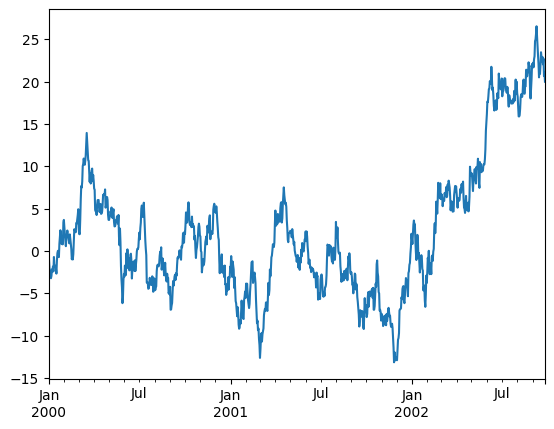

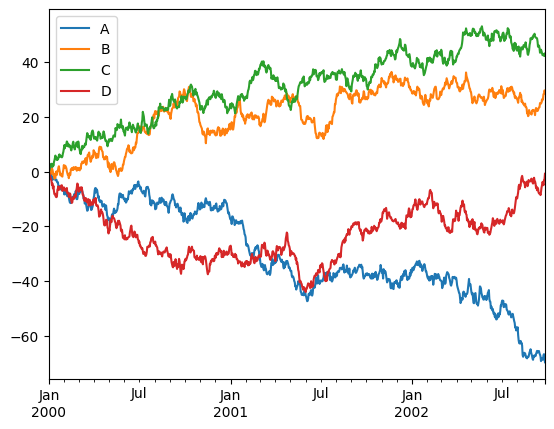

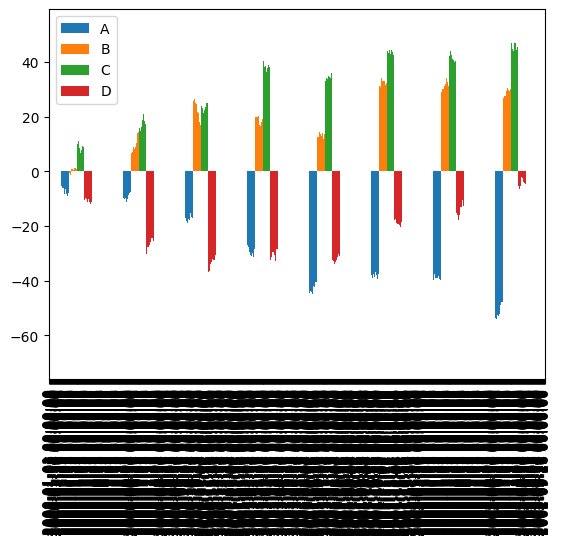

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()  # 누적 합 ( +- )
ts.plot()

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=list('ABCD'))
df = df.cumsum()
df.plot()
df.plot.bar();

In [ ]:
index = pd.date_range('1/1/2000', periods=4, freq='T')
series = pd.Series([0.0, None, 2.0, 3.0], index = index)
df = pd.DataFrame({'s':series})
df

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:01:00,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:03:00,3.0


In [ ]:
df.asfreq(freq = '30S')  # 30초 주기 데이터 (asfreq() : 원하는 주기로 데이터 나누기)

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,NaN
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,NaN
2000-01-01 00:03:00,3.0


In [ ]:
df.asfreq(freq='30S', fill_value = 9.0)  # 30초 주기의 데이터 바꾸기 (None -> 9.0)

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,9.0
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,9.0
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,9.0
2000-01-01 00:03:00,3.0


In [ ]:
df.asfreq(freq='30S', method='bfill')  # bfill : 결측값을 아래값과 동일하게 바꾸기

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,NaN
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,2.0
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,3.0
2000-01-01 00:03:00,3.0


In [ ]:
df = pd.DataFrame({'a' : [1, 2, 3, 4, 5, 6],
                   'b' : [1, 1, 2, 3, 5, 8],
                   'c' : [1, 4, 9, 16, 25, 36]})
df.head()

,a,b,c
0,1,1,1
1,2,1,4
2,3,2,9
3,4,3,16
4,5,5,25


In [ ]:
print(df.diff())  # diff : 차분 (한 객체 내에서 열과 열 / 행과 행의 차이를 출력)
                  # 자기상관성 : 각자 열이, 각자 시계열 데이터 

     a    b     c
0  NaN  NaN   NaN
1  1.0  0.0   3.0
2  1.0  1.0   5.0
3  1.0  1.0   7.0
4  1.0  2.0   9.0
5  1.0  3.0  11.0


In [ ]:
print('축을 열로', df.diff(axis=1))
print(df.diff(periods=3))  # 차분은 연속된 것뿐만 아니라, lag(시차)

축을 열로     a  b   c
0 NaN  0   0
1 NaN -1   3
2 NaN -1   7
3 NaN -1  13
4 NaN  0  20
5 NaN  2  28
     a    b     c
0  NaN  NaN   NaN
1  NaN  NaN   NaN
2  NaN  NaN   NaN
3  3.0  2.0  15.0
4  3.0  4.0  21.0
5  3.0  6.0  27.0


In [ ]:
rng = pd.date_range('1/1/2014', periods=12, freq='T')  # 2014-1-1부터 분 단위로 12주기
ts = pd.Series(np.arange(12), index = rng)  # 12개 시리즈 데이터
print(ts)
print(ts.resample('5min'))  # 5분 / 5개 -> 1개
print(ts.resample('5min').ohlc())  # open(개장가), high(고가), low(저가), close(종가)

2014-01-01 00:00:00     0
2014-01-01 00:01:00     1
2014-01-01 00:02:00     2
2014-01-01 00:03:00     3
2014-01-01 00:04:00     4
2014-01-01 00:05:00     5
2014-01-01 00:06:00     6
2014-01-01 00:07:00     7
2014-01-01 00:08:00     8
2014-01-01 00:09:00     9
2014-01-01 00:10:00    10
2014-01-01 00:11:00    11
Freq: T, dtype: int64
DatetimeIndexResampler [freq=<5 * Minutes>, axis=0, closed=left, label=left, convention=start, origin=start_day]
                     open  high  low  close
2014-01-01 00:00:00     0     4    0      4
2014-01-01 00:05:00     5     9    5      9
2014-01-01 00:10:00    10    11   10     11


In [ ]:
res = ts.resample('5min').ohlc()
res["high"]  # high(고가) 값만 출력이 가능

2014-01-01 00:00:00     4
2014-01-01 00:05:00     9
2014-01-01 00:10:00    11
Freq: 5T, Name: high, dtype: int64

In [ ]:
ts.resample('5min').sum()  # 함수를 적용

2014-01-01 00:00:00    10
2014-01-01 00:05:00    35
2014-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [ ]:
# 날짜 데이터
rng = pd.date_range('1/1/2014', periods=100, freq='D')
ts = pd.Series(np.arange(100), index=rng)  # 2014-1-1부터 일 단위로 100개의 시리즈 데이터 
print(ts)

2014-01-01     0
2014-01-02     1
2014-01-03     2
2014-01-04     3
2014-01-05     4
              ..
2014-04-06    95
2014-04-07    96
2014-04-08    97
2014-04-09    98
2014-04-10    99
Freq: D, Length: 100, dtype: int64


In [ ]:
print(ts.groupby(lambda x: x.month).mean())  # 월별 시리즈 데이터 값의 평균 

1    15.0
2    44.5
3    74.0
4    94.5
dtype: float64


In [ ]:
print(ts.groupby(lambda x: x.weekday).mean())  # 7일(한 주)마다 각 시리즈 데이터 값의 평균

0    50.5
1    51.5
2    49.0
3    50.0
4    47.5
5    48.5
6    49.5
dtype: float64


In [ ]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
start_date = '2020-01-1'
end_date = '2020-12-31'

In [ ]:
import pandas_datareader.data as web
data = web.DataReader(name="TSLA", data_source='yahoo', start = start_date, end = end_date)
print(data)

TypeError: ignored

In [ ]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})

In [ ]:
df.expanding(2).sum()  # expanding() : 누적합으로 데이터를 재표현

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


0.41227092650084257


[]

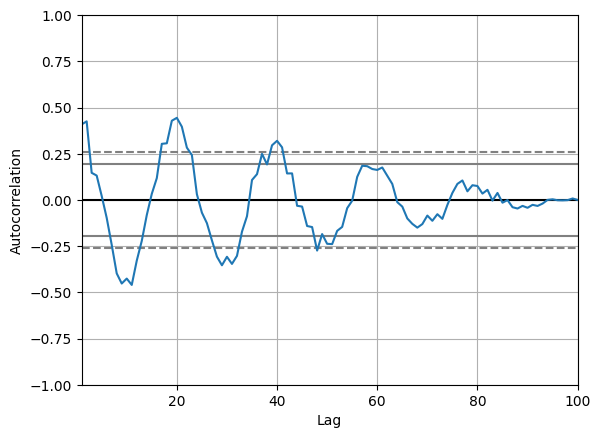

In [ ]:
import matplotlib.pyplot as plt
spacing = np.linspace(-5 * np.pi, 5 * np.pi, num = 100)
s = pd.Series(0.7 * np.random.rand(100) + 0.3 * np.sin(spacing))
print(s.autocorr())  # 0.41227092650084257
x = pd.plotting.autocorrelation_plot(s)  # 자기상관성 그래프
x.plot()

In [ ]:
np.random.seed(0)
ts = pd.Series(np.random.randn(4), index=pd.date_range(
    "2019-1-1", periods = 4, freq='M'))
ts

2019-01-31    1.764052
2019-02-28    0.400157
2019-03-31    0.978738
2019-04-30    2.240893
Freq: M, dtype: float64

In [ ]:
# shift
ts.shift(1)  # 시프트 연산

2019-01-31         NaN
2019-02-28    1.764052
2019-03-31    0.400157
2019-04-30    0.978738
Freq: M, dtype: float64

In [ ]:
ts.shift(-1)  # 역방향

2019-01-31    0.400157
2019-02-28    0.978738
2019-03-31    2.240893
2019-04-30         NaN
Freq: M, dtype: float64

In [ ]:
ts / (ts.shift(1) - ts)

2019-01-31         NaN
2019-02-28    0.293393
2019-03-31   -1.691619
2019-04-30   -1.775450
Freq: M, dtype: float64

In [ ]:
s = pd.Series([2, 3, 4, 10, 11])
s.rolling(3, center=True).mean()  #  이동 명령어 : rolling, window

0         NaN
1    3.000000
2    5.666667
3    8.333333
4         NaN
dtype: float64

In [ ]:
# Time zone
import pytz
tz = pytz.timezone('Asia/Seoul')
print(tz)
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='Q-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts_utc = ts.tz_localize('UTC')
print(ts_utc.index)
print(ts.index.tz_localize('Asia/Seoul'))  # Business day : 휴일로 인해.

Asia/Seoul
DatetimeIndex(['2012-03-31 09:30:00+00:00', '2012-06-30 09:30:00+00:00',
               '2012-09-30 09:30:00+00:00', '2012-12-31 09:30:00+00:00',
               '2013-03-31 09:30:00+00:00', '2013-06-30 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='Q-DEC')
DatetimeIndex(['2012-03-31 09:30:00+09:00', '2012-06-30 09:30:00+09:00',
               '2012-09-30 09:30:00+09:00', '2012-12-31 09:30:00+09:00',
               '2013-03-31 09:30:00+09:00', '2013-06-30 09:30:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq=None)


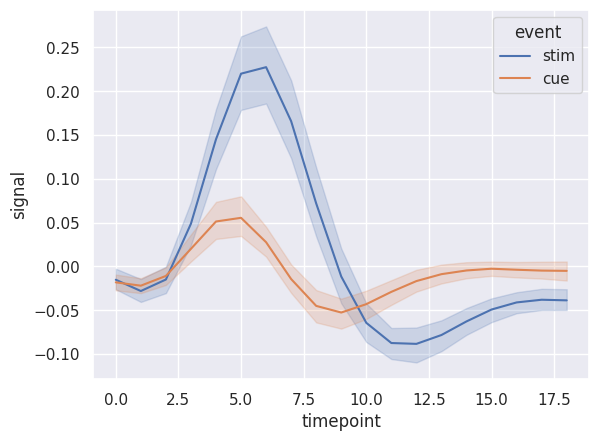

In [ ]:
# 시계열 데이터를 시각화
import seaborn as sns; sns.set()
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri)  # 기존 tsplot은 사라짐

<Axes: xlabel='timepoint', ylabel='signal'>

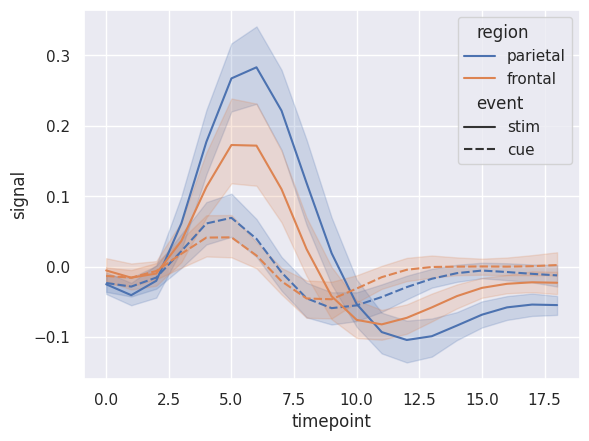

In [ ]:
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri)

In [ ]:
!pip install -U finance-datareader
!pip install pandas-datareader
!pip install --upgrade mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
import pandas_datareader as pdr
gs = pdr.get_data_fred('GS10')
print(gs.shape)
print(gs.head())
pdr.nasdaq_trader.get_nasdaq_symbols()  # 나스닥에 있는 심볼 데이터를 가져옴

(59, 1)
            GS10
DATE            
2018-06-01  2.91
2018-07-01  2.89
2018-08-01  2.89
2018-09-01  3.00
2018-10-01  3.15


,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
A,True,"Agilent Technologies, Inc. Common Stock",N,,False,100.0,False,NaN,A,A,False
AA,True,Alcoa Corporation Common Stock,N,,False,100.0,False,NaN,AA,AA,False
AAA,True,Investment Managers Series Trust II AXS First ...,P,,True,100.0,False,NaN,AAA,AAA,False
AAAU,True,Goldman Sachs Physical Gold ETF Shares,Z,,True,100.0,False,NaN,AAAU,AAAU,False
AAC,True,Ares Acquisition Corporation Class A Ordinary ...,N,,False,100.0,False,NaN,AAC,AAC,False
...,...,...,...,...,...,...,...,...,...,...,...
ZXYZ.A,True,Nasdaq Symbology Test Common Stock,Q,Q,False,100.0,True,N,NaN,ZXYZ.A,False
ZXZZT,True,NASDAQ TEST STOCK,Q,G,False,100.0,True,N,NaN,ZXZZT,False
ZYME,True,Zymeworks Inc. - Common Stock,Q,Q,False,100.0,False,N,NaN,ZYME,False


In [ ]:
# pdr.quandl.QuandlReader("078930.KS")  # API key가 필요

ValueError: ignored

In [ ]:
df_krx = fdr.StockListing('NASDAQ')
df_krx.head()

100%|██████████| 4313/4313 [00:33<00:00, 127.11it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
4,NVDA,NVIDIA Corp,반도체 및 반도체 장비,571010


In [ ]:
df_krx = fdr.StockListing('KOSPI')
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,64800,2,-500,-0.77,65500,65500,64600,6110928,396496284900,386841909240000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,567000,1,4000,0.71,561000,569000,559000,52830,29882237000,132678000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,87400,1,100,0.11,87200,87700,86500,822826,71796428600,63627406701000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,784000,2,-4000,-0.51,790000,791000,784000,10757,8467420000,55800416000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,717000,2,-5000,-0.69,717000,723000,713000,69892,50155740000,50614709931000,70592343,STK


In [ ]:
import FinanceDataReader as fdr
samsung = fdr.DataReader('005930', '2020-1-1', '2022-12-31')  # 삼성전자
samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


<Axes: xlabel='Date'>

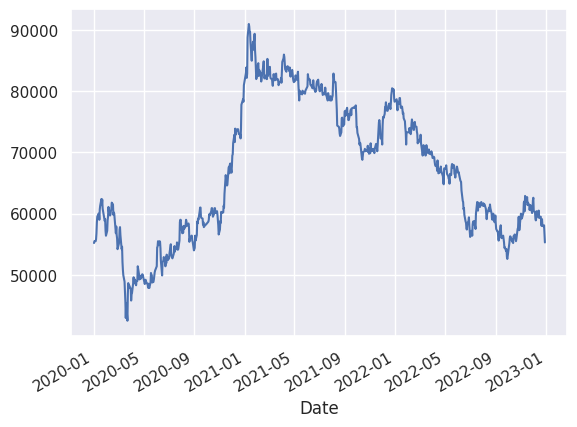

In [ ]:
samsung['Close'].plot()

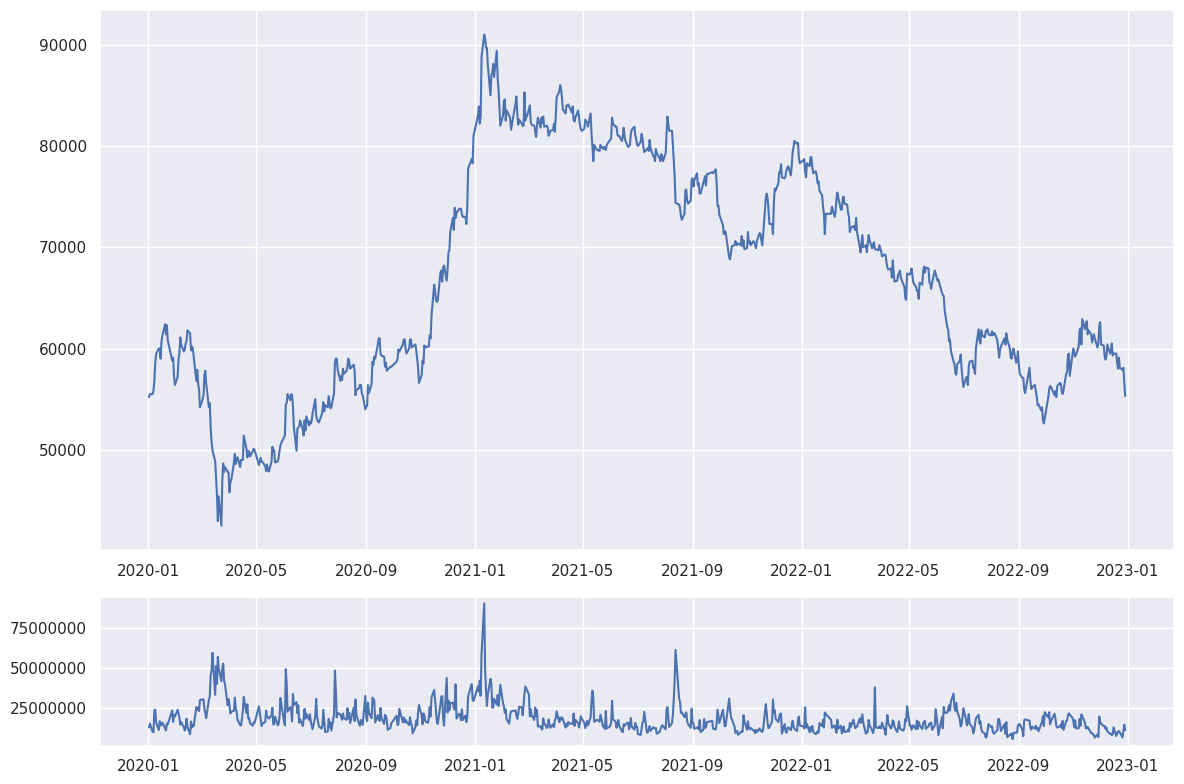

In [ ]:
fig = plt.figure(figsize=(12, 8))  # 그래픽 관리자
# 화면 분할
top_axes = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)  # 4x4 행렬 생성 후 0x0 위치에서 시작할 것 / 도화지 
bottom_axes = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)
top_axes.plot(samsung.index, samsung['Close'], label='Adjusted Close')  # 종가(Close) 그래프 
bottom_axes.plot(samsung.index, samsung['Volume'])  # Volume : 매매량 그래프

plt.tight_layout()
plt.show()

In [ ]:
!pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 봉 차트
import matplotlib.ticker as ticker
import mpl_finance as matfin
import datetime

start = datetime.datetime(2019, 3, 1)
end = datetime.datetime(2019, 3, 31)
hynix = fdr.DataReader("000660", start, end)
print(hynix.head(10))

             Open   High    Low  Close   Volume    Change
Date                                                     
2019-03-04  70300  71400  69900  70100  4931703  0.001429
2019-03-05  68300  70000  68300  69700  3465521 -0.005706
2019-03-06  68500  69600  67400  68100  4958303 -0.022956
2019-03-07  67200  68900  67100  68100  3402570  0.000000
2019-03-08  67900  68200  66200  66700  3571792 -0.020558
2019-03-11  67000  67800  66200  66600  2869008 -0.001499
2019-03-12  67700  68600  67500  67700  2753535  0.016517
2019-03-13  67700  67800  65900  66800  2851596 -0.013294
2019-03-14  67400  67400  66400  67300  3107100  0.007485
2019-03-15  67400  68700  66700  68100  3645592  0.011887


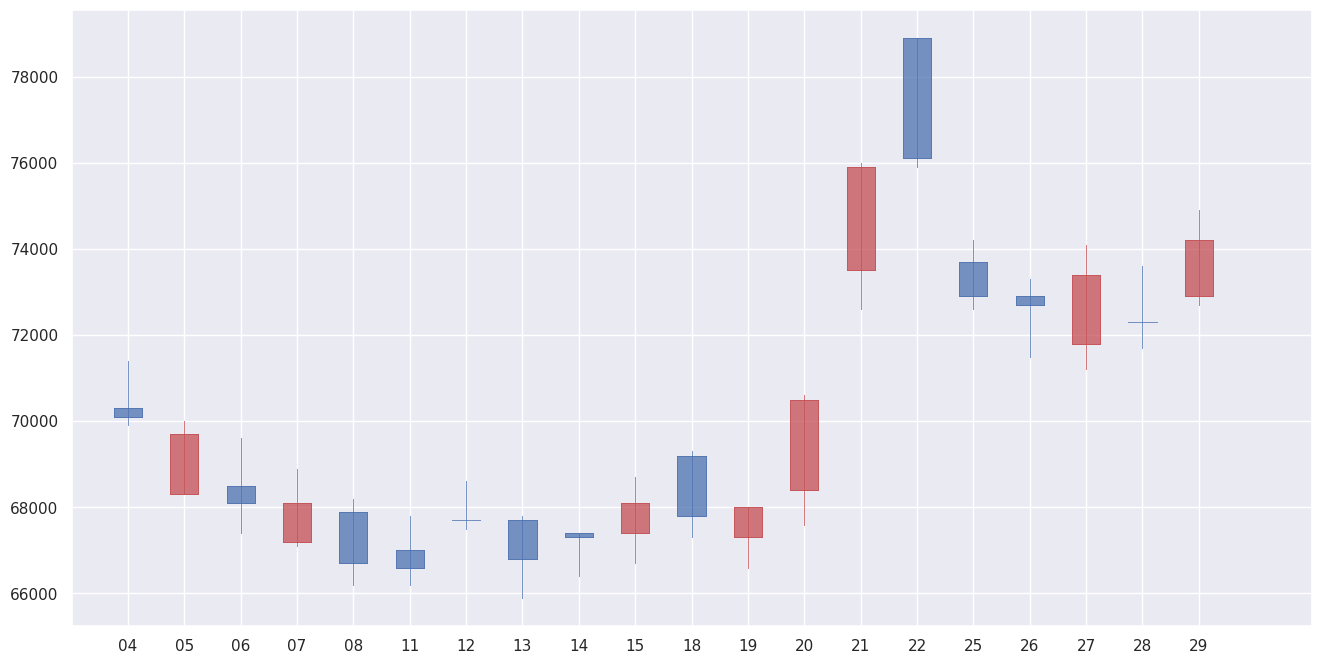

In [ ]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
day_list = range(len(hynix))  # 개수
name_list = []
for day in hynix.index:
  name_list.append(day.strftime('%d'))  # 날짜만
ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))  # 개수에 맞게 이름 부여
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))
matfin.candlestick2_ohlc(ax, hynix['Open'], hynix['High'], hynix['Low'],
        hynix['Close'], width=0.5, colorup='r', colordown='b')
plt.show()

In [ ]:
tiker_list = ['AAPL', 'MSFT', 'AMZN']  # 애플, MS, 아마존
df_list = [fdr.DataReader(ticker, '2010-01-01', '2016-12-31')['Close']
           for ticker in tiker_list]
panel_data = pd.concat(df_list, axis=1)
panel_data.columns = ['AAPL', 'MSFT', 'AMZN']
panel_data = panel_data.dropna()
panel_data.head(10)
close = panel_data
close.head(10)

,AAPL,MSFT,AMZN
Date,,,
2010-01-04,7.643214,30.950001,6.6950
2010-01-05,7.656429,30.959999,6.7345
2010-01-06,7.534643,30.770000,6.6125
2010-01-07,7.520714,30.450001,6.5000
2010-01-08,7.570714,30.660000,6.6760
2010-01-11,7.503929,30.270000,6.5155
2010-01-12,7.418571,30.070000,6.3675
2010-01-13,7.523214,30.350000,6.4555
2010-01-14,7.479643,30.959999,6.3675


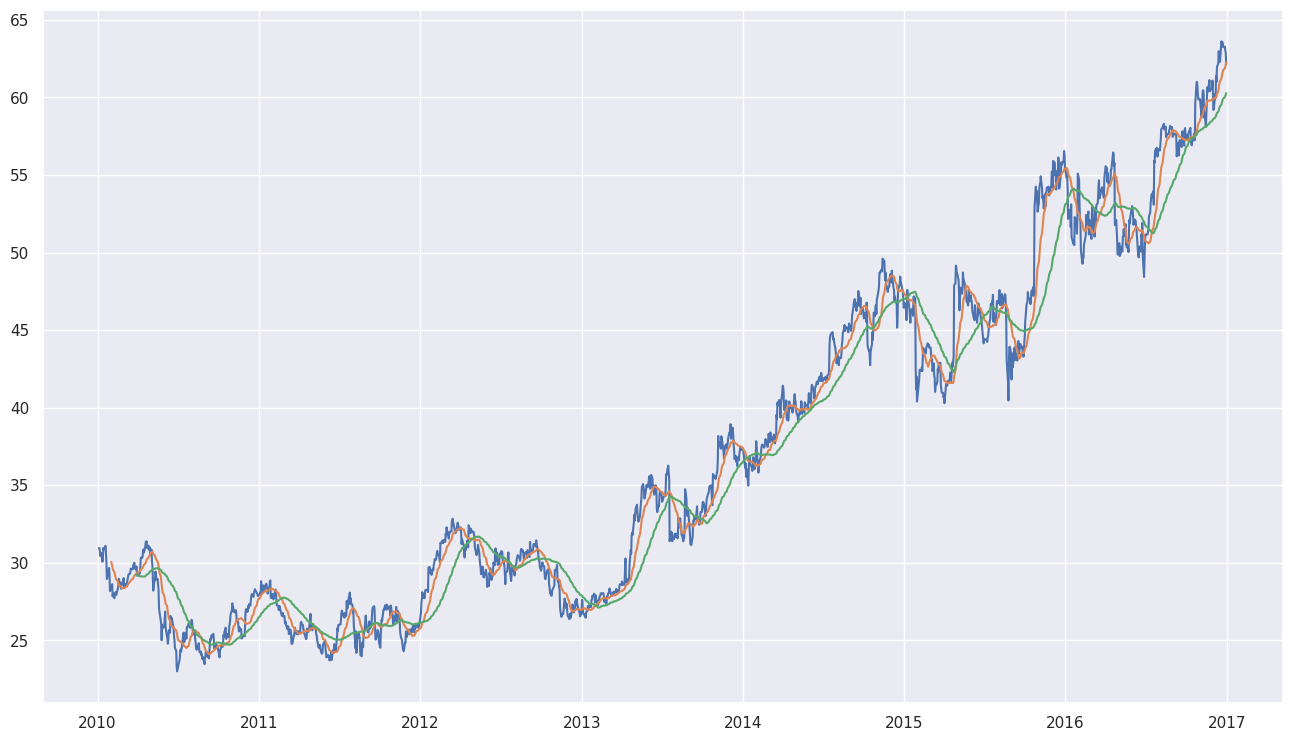

In [ ]:
# 문제
# 마이크로소프트의 20일 이평과, 60일 이평을 계산
msft = close.loc[:, 'MSFT']
short_rolling_msft = msft.rolling(window=20).mean()  # 20일 이동 평균선
long_rolling_msft = msft.rolling(window=60).mean()

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='60 days')
plt.show()

In [ ]:
import seaborn as sns
sns.set(style="darkgrid", context='talk', palette='Dark2')

In [ ]:
path = '/content/drive/MyDrive/stock_px.csv'
data = pd.read_csv(path, parse_dates = True, index_col = 0)
data.head(10)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [ ]:
short_rolling = data.rolling(window = 20).mean()
short_rolling.head(20)

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN,NaN
2003-01-08,NaN,NaN,NaN,NaN
2003-01-09,NaN,NaN,NaN,NaN
2003-01-10,NaN,NaN,NaN,NaN
2003-01-13,NaN,NaN,NaN,NaN
2003-01-14,NaN,NaN,NaN,NaN
2003-01-15,NaN,NaN,NaN,NaN


In [ ]:
long_rolling = data.rolling(window = 100).mean()
long_rolling.tail()

,AAPL,MSFT,XOM,SPX
2011-10-10,365.9714,25.4844,76.8438,1242.5304
2011-10-11,366.5690,25.5088,76.7886,1241.0498
2011-10-12,367.2387,25.5350,76.7499,1239.7896
2011-10-13,367.9790,25.5666,76.7122,1238.6525
2011-10-14,368.8771,25.5993,76.6857,1237.7355


In [ ]:
returns = data.pct_change(1)  # 하루 전과 얼마나 변화가 있는지?
returns.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086


In [ ]:
log_returns = np.log(data).diff()  # 비정상성의 데이터 => 정상성 데이터로 변환
log_returns.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006734,0.001420,0.000684,-0.000484
2003-01-06,0.000000,0.017816,0.024326,0.022226
2003-01-07,-0.002688,0.018873,-0.034293,-0.006566
2003-01-08,-0.020395,-0.028679,-0.004154,-0.014186


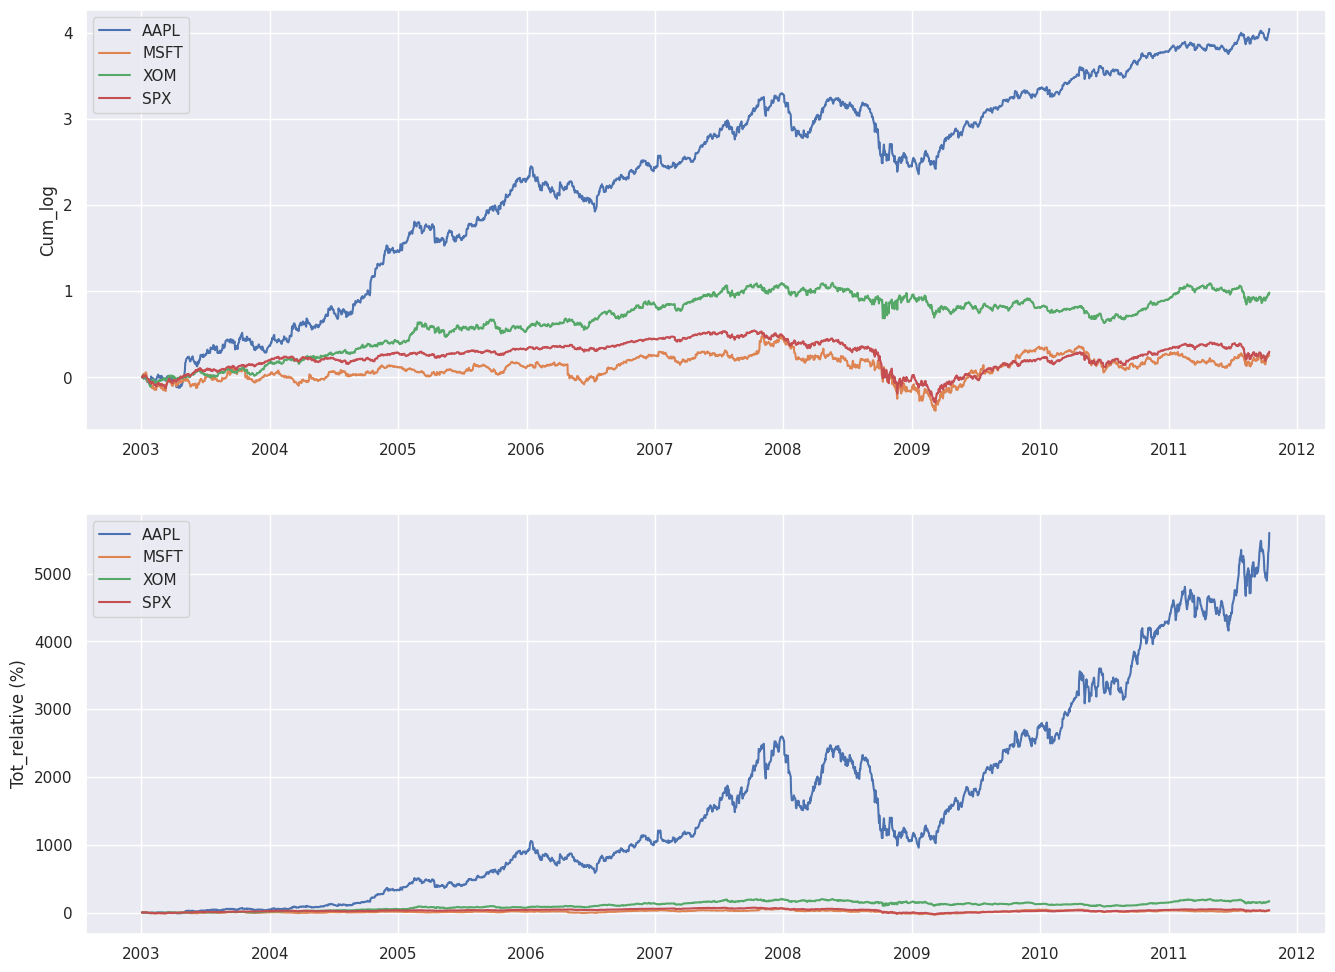

In [ ]:
# 4개의 데이터를 비교 분석 (AAPL, MSFT, XOM, SPX)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
for c in log_returns:
  ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))
ax1.set_ylabel('Cum_log')
ax1.legend(loc = 'best')
for c in log_returns:
  ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) -1 ),
           label=str(c))
ax2.set_ylabel('Tot_relative (%)')
ax2.legend(loc = 'best')
plt.show()

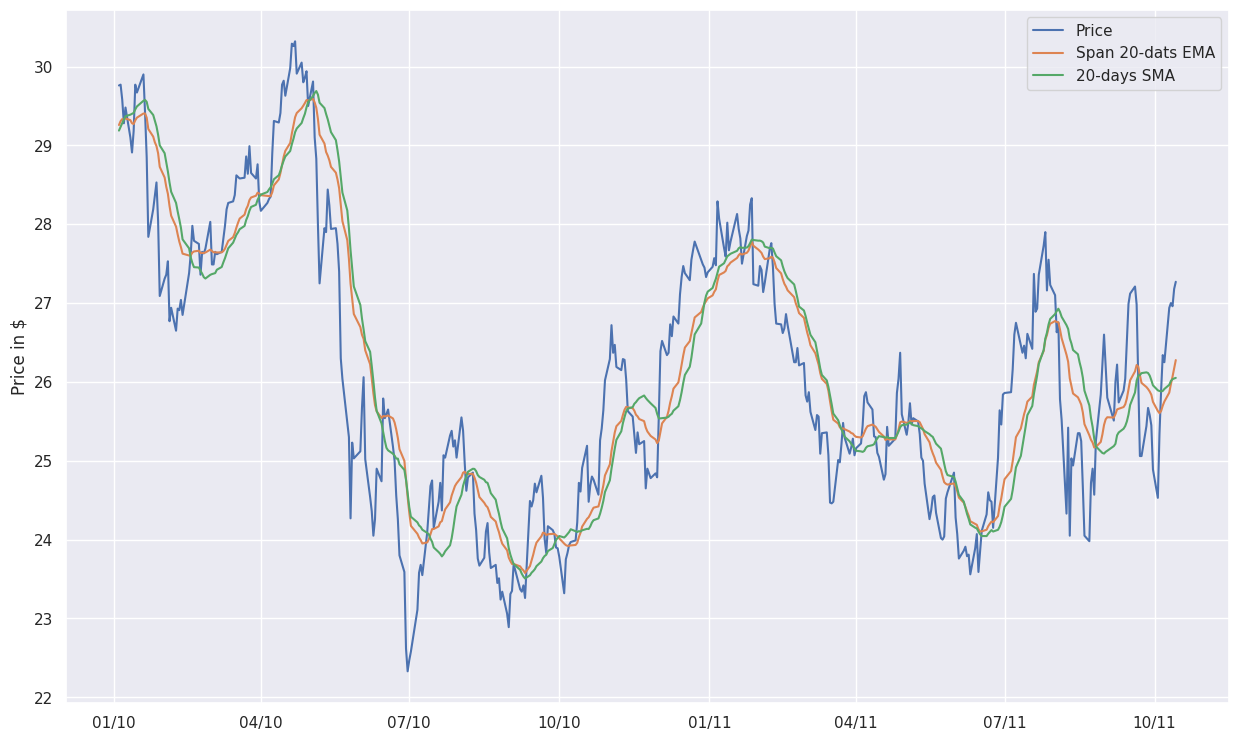

In [ ]:
# 지수 가중 이동 법(ewm)과, 20일 이평
import matplotlib.dates as mdates
my_year_month_fmt = mdates.DateFormatter('%m/%y')
start_date = '2010-01-02'
end_date = '2018-10-14'
ema_short = data.ewm(span=20, adjust=False).mean()

# 시각화
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date,
                                                         'MSFT'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date,
                                              'MSFT'], label = 'Span 20-dats EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index,
        short_rolling.loc[start_date:end_date, 'MSFT'], label='20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)
# 매매포인트는 교차점이다 (차이값이 부호가 바뀔 때)

In [ ]:
trading_positions_raw = data - ema_short
trading_positions_raw.tail()

,AAPL,MSFT,XOM,SPX
2011-10-10,2.761032,1.075701,3.156261,33.142519
2011-10-11,12.884743,1.027539,2.846617,30.574184
2011-10-12,13.376672,0.893487,3.380749,38.257119
2011-10-13,17.748418,1.007441,2.344011,31.365488
2011-10-14,28.335711,0.992923,3.695057,47.305918


In [ ]:
# 부호로 판단
trading_positions = trading_positions_raw.apply(np.sign) * 1/3
trading_positions

,AAPL,MSFT,XOM,SPX
2003-01-02,0.000000,0.000000,0.000000,0.000000
2003-01-03,0.333333,0.333333,0.333333,-0.333333
2003-01-06,0.333333,0.333333,0.333333,0.333333
2003-01-07,0.333333,0.333333,-0.333333,0.333333
2003-01-08,-0.333333,0.333333,-0.333333,-0.333333
...,...,...,...,...
2011-10-10,0.333333,0.333333,0.333333,0.333333
2011-10-11,0.333333,0.333333,0.333333,0.333333
2011-10-12,0.333333,0.333333,0.333333,0.333333
2011-10-13,0.333333,0.333333,0.333333,0.333333


In [ ]:
# 부호가 바뀌고, 첫 거래에서 매매
trading_positions_final = trading_positions.shift(1)

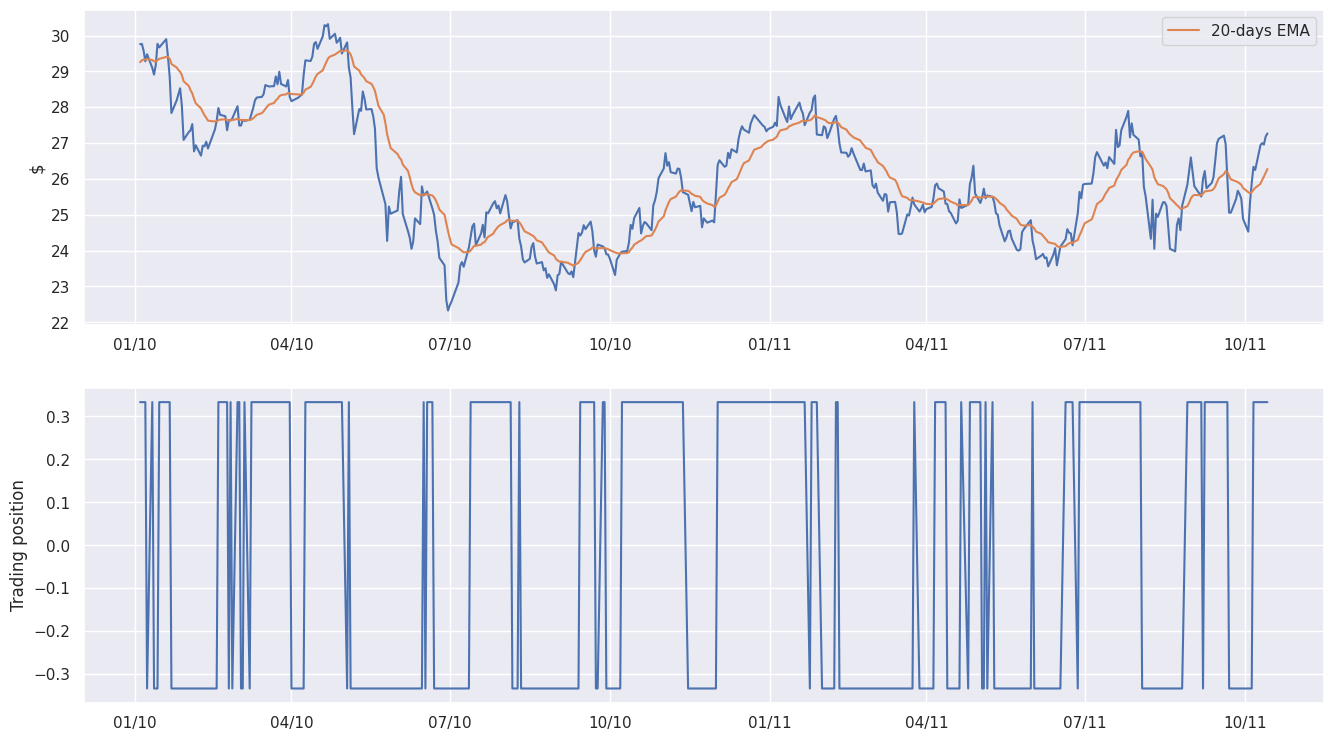

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))
ax1.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'MSFT'])
ax1.plot(ema_short.loc[start_date:end_date, :].index,
         ema_short.loc[start_date:end_date, 'MSFT'], label = '20-days EMA')
ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)
ax2.plot(trading_positions_final.loc[start_date:end_date, :].index,
         trading_positions_final.loc[start_date:end_date, 'MSFT'],
         label = 'Trading position')
ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)


In [127]:
import seaborn as sns
from sklearn.metrics import mean_squared_error
from pandas import Series
from datetime import datetime

path = '/content/drive/MyDrive/austr.csv'
df = pd.read_csv(path, parse_dates = ['Month'])  # 열을 지정
df

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9
...,...,...
471,1995-04-01,127.0
472,1995-05-01,151.0
473,1995-06-01,130.0
474,1995-07-01,119.0


In [128]:
# 문제
# 'Monthly beer production' => 'M_beer_Prod' 로 바꾸기 
df.rename(columns={'Month':'month','Monthly beer production': 'M_beer_Prod'}, inplace=True)
print(df)

         month  M_beer_Prod
0   1956-01-01         93.2
1   1956-02-01         96.0
2   1956-03-01         95.2
3   1956-04-01         77.1
4   1956-05-01         70.9
..         ...          ...
471 1995-04-01        127.0
472 1995-05-01        151.0
473 1995-06-01        130.0
474 1995-07-01        119.0
475 1995-08-01        153.0

[476 rows x 2 columns]


<Axes: >

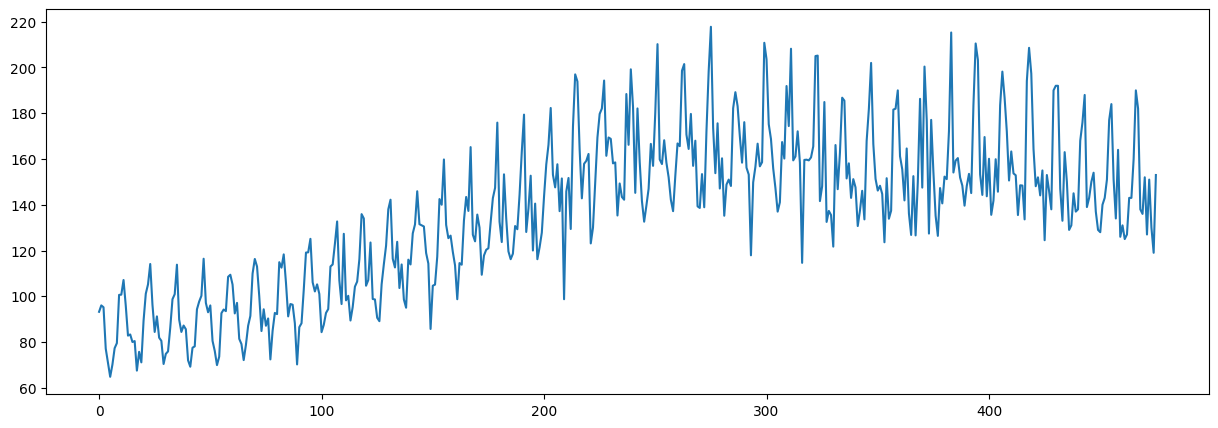

In [129]:
# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
df['M_beer_Prod'].plot()

In [130]:
# 문제
# 월별로 제품의 평균을 시각화
df['Day']=df.month.dt.day
df['Year']=df.month.dt.year
df['months']=df.month.dt.month

<Axes: xlabel='months'>

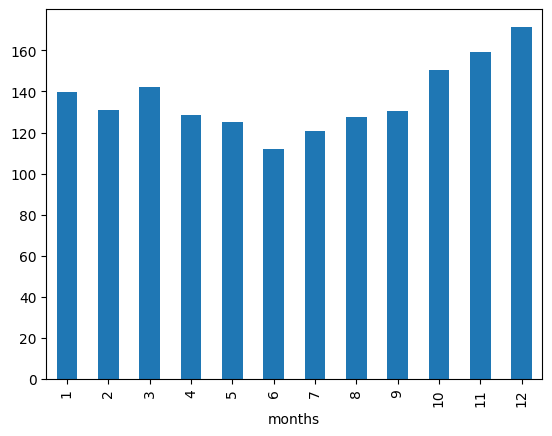

In [131]:
df.groupby(df['months'])['M_beer_Prod'].mean().plot.bar()

<Axes: xlabel='Year'>

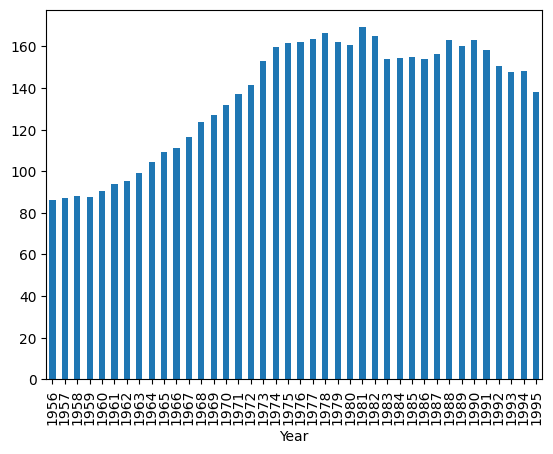

In [132]:
df.groupby(df['Year'])['M_beer_Prod'].mean().plot.bar()

<Axes: xlabel='Year', ylabel='M_beer_Prod'>

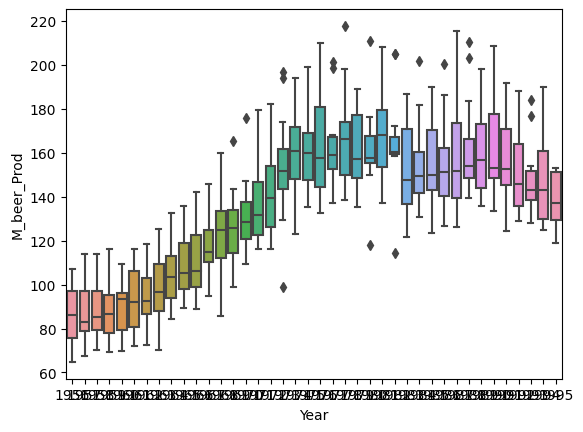

In [133]:
# 년도별로 묶고 이상치 확인하기
sns.boxplot(x=df.Year,y=df['M_beer_Prod'])

In [134]:
df.Timestamp=pd.to_datetime(df.month)
df.index=df.Timestamp
df=df.resample('M').mean()

<ipython-input-134-5f7f94de0160>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Timestamp=pd.to_datetime(df.month)
<ipython-input-134-5f7f94de0160>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df.resample('M').mean()


In [135]:
df.head()

,M_beer_Prod,Day,Year,months
month,,,,
1956-01-31,93.2,1.0,1956.0,1.0
1956-02-29,96.0,1.0,1956.0,2.0
1956-03-31,95.2,1.0,1956.0,3.0
1956-04-30,77.1,1.0,1956.0,4.0
1956-05-31,70.9,1.0,1956.0,5.0


In [136]:
len(df) * 0.7

333.2

In [137]:
train = df.iloc[0:333]
valid = df.iloc[333:]

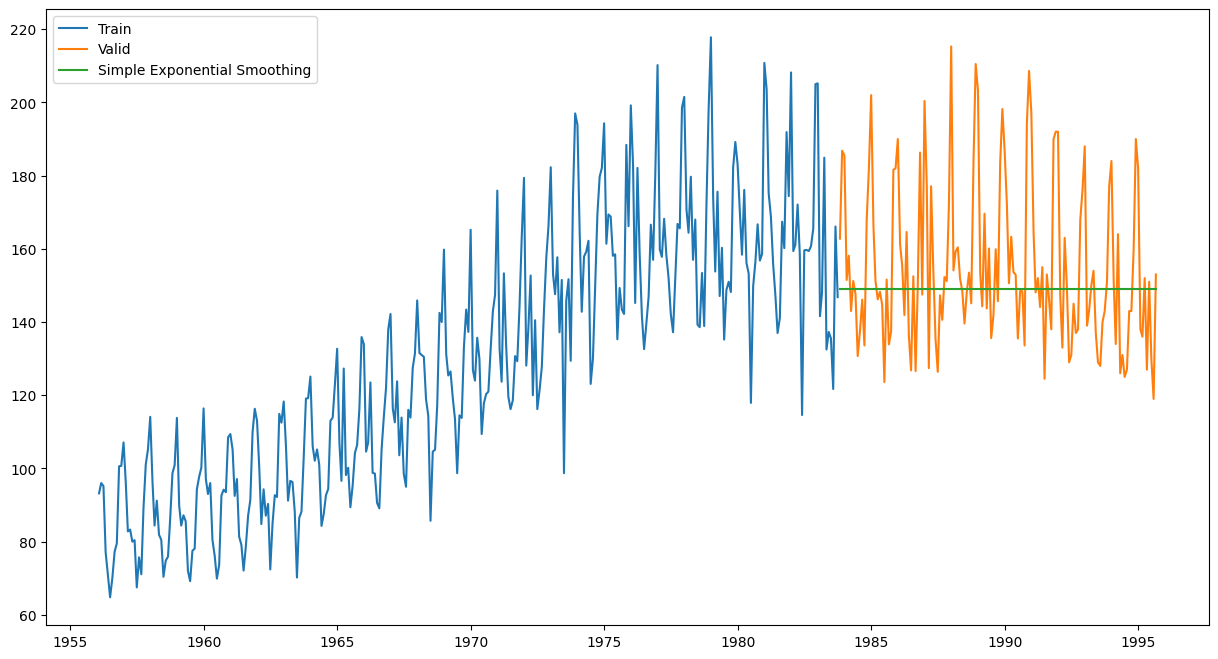

In [138]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing
y_hat=valid.copy()
# 적합한다
# hyper parameter -> optimization의 대상 (test 되었다.)
# hyper parameter tuning
# series -> ndarray로 바꿔라 (statsmodels : ndarray기반 )
fit=SimpleExpSmoothing(np.asarray(train['M_beer_Prod'])).fit(smoothing_level=0.8,optimized=False)
y_hat['SES']=fit.forecast(len(valid))
plt.figure(figsize=(15,8))
plt.plot(train['M_beer_Prod'],label='Train')
plt.plot(valid['M_beer_Prod'],label='Valid')
plt.plot(y_hat["SES"],label='Simple Exponential Smoothing')
plt.legend(loc='best')

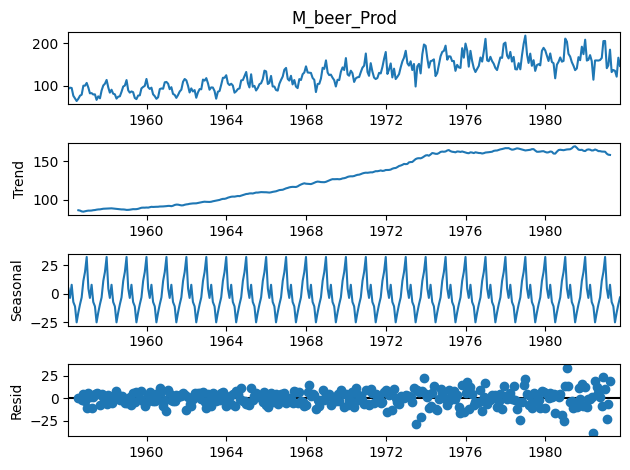

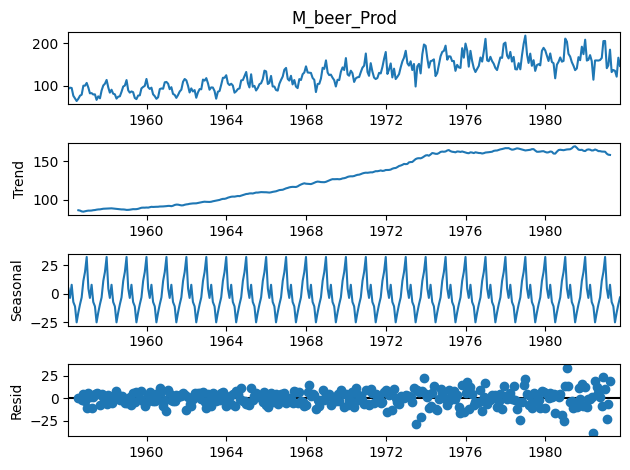

In [139]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train['M_beer_Prod']).plot()
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(train['M_beer_Prod']).plot()
plt.show()

<ipython-input-140-dff178d4f392>:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1=Holt(np.asarray(train['M_beer_Prod']),damped=True).fit(smoothing_level=0.1,smoothing_slope=0.02)
<ipython-input-140-dff178d4f392>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1=Holt(np.asarray(train['M_beer_Prod']),damped=True).fit(smoothing_level=0.1,smoothing_slope=0.02)


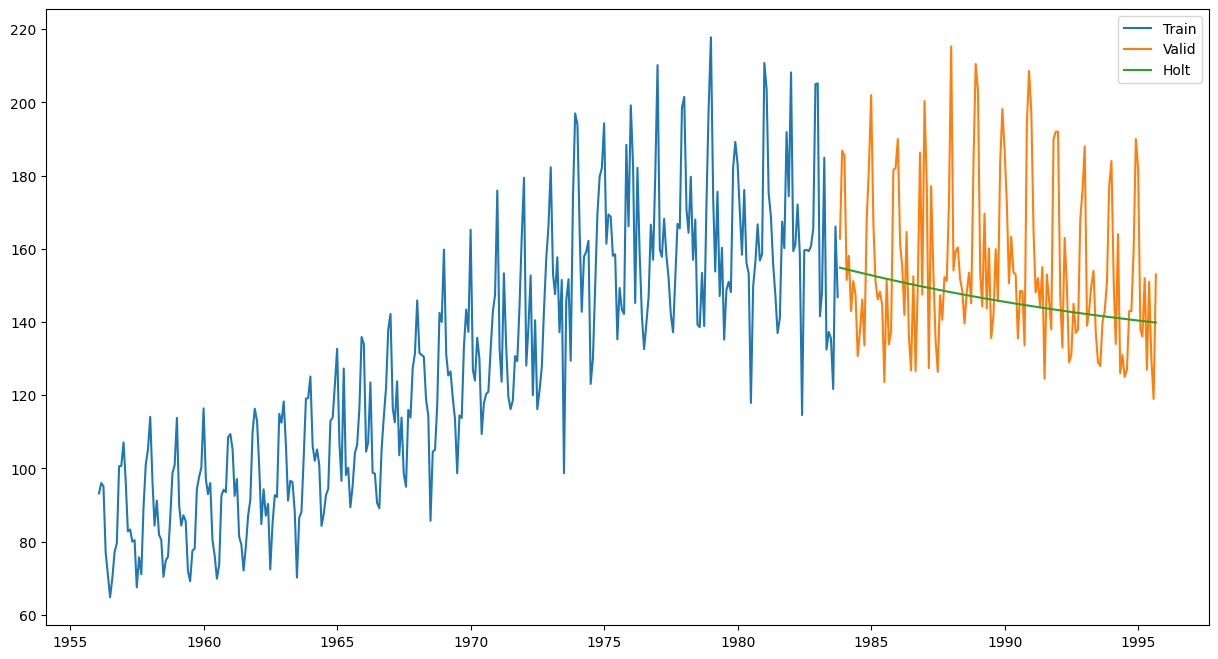

In [140]:
# holtwinters = simple + 계절성을 고려하는 모델
from statsmodels.tsa.holtwinters import Holt
y_hat=valid.copy()
fit1=Holt(np.asarray(train['M_beer_Prod']),damped=True).fit(smoothing_level=0.1,smoothing_slope=0.02)
y_hat['Holt선형모델']=fit1.forecast(len(valid))
plt.figure(figsize=(15,8))
plt.plot(train['M_beer_Prod'],label='Train')
plt.plot(valid['M_beer_Prod'],label='Valid')
plt.plot(y_hat['Holt선형모델'],label='Holt')
plt.legend(loc='best')

In [81]:
# 문제
# 잔차(residual) 구하기 
valid["M_beer_Prod"] - y_hat["Holt선형모델"]  # 상계가 벌어진다.

333     7.933456
334    32.088328
335    30.942302
336    -2.904617
337     3.847576
         ...    
471   -13.130072
472    10.939324
473    -9.991683
474   -20.923091
475    13.145104
Length: 143, dtype: float64

In [141]:
# root mean square error
rmse=np.sqrt(mean_squared_error(valid['M_beer_Prod'],y_hat['Holt선형모델']))
rmse

23.074874052848156

<ipython-input-142-8fabbbaa1f29>:3: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit2=ExponentialSmoothing(np.asarray(train['M_beer_Prod']),trend='add',


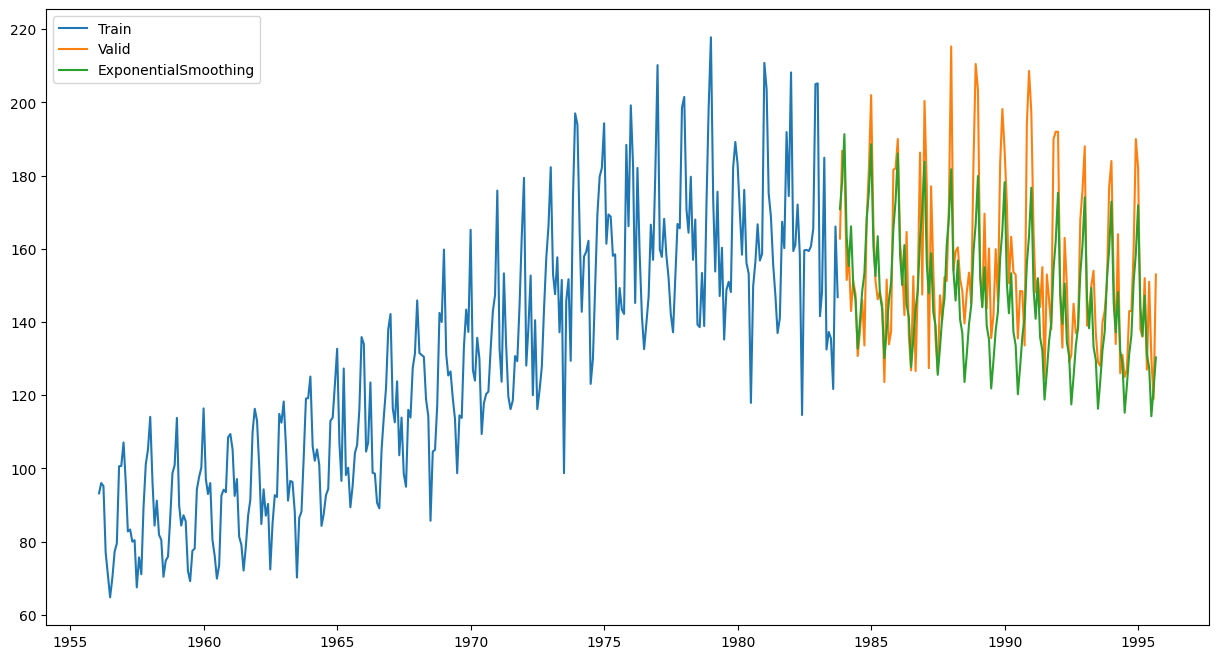

In [142]:
from statsmodels.tsa.api import ExponentialSmoothing
y_hat=valid.copy()
fit2=ExponentialSmoothing(np.asarray(train['M_beer_Prod']),trend='add',
                          damped=True,seasonal='add',seasonal_periods=12).fit()
y_hat['HS']=fit2.forecast(len(valid))
plt.figure(figsize=(15,8))
plt.plot(train['M_beer_Prod'],label='Train')
plt.plot(valid['M_beer_Prod'],label='Valid')
plt.plot(y_hat['HS'],label='ExponentialSmoothing')
plt.legend(loc='best')

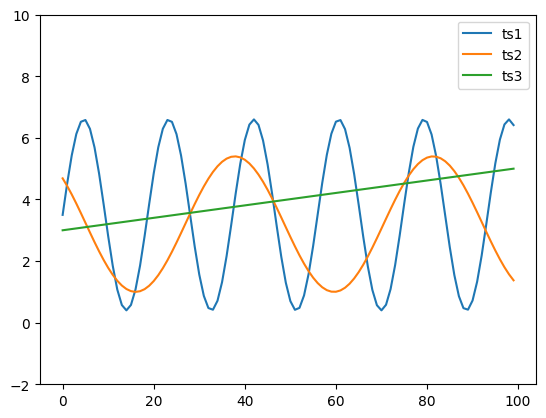

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 주기성을 가지고 있는 데이터 비교 
# DTW (dynamic time warping) : 거리값을 계산 (최단거리로 거리를 재는 목적)
x = np.linspace(0, 50, 100)
ts1 = pd.Series(3.1*np.sin(x/1.5)+3.5)
ts2 = pd.Series(2.2*np.sin(x/3.5+2.4)+3.2)
ts3 = pd.Series(0.04*x+3.0)

ts1.plot()
ts2.plot()
ts3.plot()

plt.ylim(-2, 10)
plt.legend(['ts1', 'ts2', 'ts3'])
plt.show()

In [14]:
def euclid_dist(t1, t2):
  return np.sqrt(sum((t1-t2)**2))

In [15]:
print(euclid_dist(ts1, ts2))
print(euclid_dist(ts1, ts3))

26.959216037969345
23.189249190311056


In [16]:
def DTWDistance(s1, s2):
  DTW={}  # dict로 초기화
  for i in range(len(s1)): 
    DTW[(i, -1)] = float('inf')  # infinity (무한대)
  for i in range(len(s2)):
    DTW[(-1, i)] = float('inf')
  DTW[(-1, -1)] = 0

  for i in range(len(s1)):
    for j in range(len(s2)):
      dist= (s1[i]-s2[j])**2  # 거리값 - 유클리디안 거리
      DTW[(i, j)] = dist + min(DTW[(i-1, j)], DTW[(i, j-1)],
                               DTW[(i-1, j-1)])
  return np.sqrt(DTW[len(s1)-1, len(s2)-1])  # 거리값에 루트를 씌워, 순수한 거리값을 리턴

In [17]:
print(DTWDistance(ts1, ts2))
print(DTWDistance(ts1, ts3))
print(DTWDistance(ts2, ts3))

17.929718468641138
21.549494824404572
14.846846666395088
